In [8]:
from relationGraph import Relation, RelationGraph, MatrixOfRelationGraph
from autoencoder import seedy, AutoEncoder
from main import test_build_relation_graph_with_symertic_data, test_convert_graph_to_2D_matrix, test_get_matix_for_autoencoder, test_autoencoder
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from base import load_source
from base2 import load_dicty
from os.path import join
import pandas as pd
import matplotlib.pyplot as plt

import utilityFunctions as uf
import multiprocessing
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
graph1 = load_dicty('clustering', 2)
graph2 = load_dicty(None, 2)
graph3 = load_dicty()

0.0
1.0

0.0
1.0

0.0
1.0
-------------RelationGraph-------------
Gene	1024
3	ann-(1024, 128), expr-(1024, 256), ppi-(1024, 1024)
0	
GO term	128
0	
1	ann-(1024, 128)
Experimental condition	256
0	
1	expr-(1024, 256)

0.0
1.0

0.0
1.0

0.0
1.0
-------------RelationGraph-------------
Gene	1024
3	ann-(1024, 128), expr-(1024, 256), ppi-(1024, 1024)
0	
GO term	128
0	
1	ann-(1024, 128)
Experimental condition	256
0	
1	expr-(1024, 256)

0.0
1.0

0.0
1.0

0.0
1.0
-------------RelationGraph-------------
Gene	1219
3	ann-(1219, 116), expr-(1219, 282), ppi-(1219, 1219)
0	
GO term	116
0	
1	ann-(1219, 116)
Experimental condition	282
0	
1	expr-(1219, 282)



In [29]:
def read_graph(graph):
    already = set()
    list_of_relations = []
    for obj in graph.objects.values():        
        for relation in obj.relation_x:
            if relation.name not in already:
                already.add(relation.name)
                list_of_relations.append(relation)

        for relation in obj.relation_y:
            if relation.name not in already:
                already.add(relation.name)
                list_of_relations.append(relation)
    
    return list_of_relations
                
l1 = read_graph(graph1)
l2 = read_graph(graph2)
l3 = read_graph(graph3)

# gens = dict(zip(relation.get_x_list(), np.zeros(len(relation.get_x_list()))))
gens = {}

for relation in l3:
    for i, k in enumerate(relation.x):
#        print(str(i) + ' ' + str(k) + ' ' + str(len(np.nonzero(relation.matrix[i])[0])) + ' ' + str(np.nonzero(relation.matrix[i])))
        if k in gens:
            gens[k] += len(np.nonzero(relation.matrix[i])[0])
        else:
            gens[k] = len(np.nonzero(relation.matrix[i])[0])
        
#         # Generate data on commute times.
#     x = 0
#     data = []
#     for v in gens.values():
#         for i in range(int(v)):
#             data.append(x)
#         x+=1

#     print(len(data))
#     size, scale = 1000, 10
#     commutes = pd.DataFrame(data)
#     commutes.plot.hist(grid=True, bins=1219, rwidth=0.9,
#                        color='#607c8e')
#     plt.title('Distribution gens in Dicty dataset')
#     plt.xlabel('Gens')
#     plt.ylabel('Num of expressions')
#     plt.grid(axis='y', alpha=0.75)
#     plt.show()

print(len(gens))

all_gens = [v for v in gens.values()]

print(len(all_gens))
print(max(all_gens))

new_data = []
all_gens.sort(reverse = True)
x = 1
for i in all_gens:
    for j in range(int(i)):
        new_data.append(x)
    x+=1

size, scale = 1000, 10
commutes = pd.DataFrame(new_data)
commutes
# commutes.plot.hist(grid=False, bins=1219, rwidth=0.9,
#                    color='#607c8e', stacked=True)
# plt.title('Distribution gens in Dicty dataset')
# plt.xlabel('Gens')
# plt.ylabel('Num of expressions')
# plt.grid(axis='y', alpha=0.75)
# plt.show()

# print(len(new_data))
# print(new_data)
# data = []
# r = []
# for relation in l1:
#     if relation.matrix.shape[1] == 1024:
#         data = relation.matrix
#         r = relation

1219
1219
518


,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


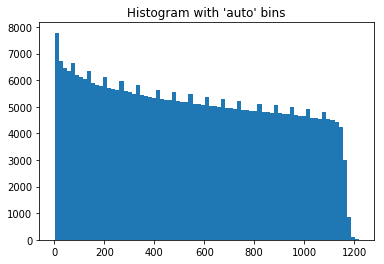

In [24]:
import matplotlib.pyplot as plt
rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack(new_data)
_ = plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [30]:
np.argwhere(r.matrix.flatten())
a = r.matrix.flatten()
a[a > 0]

array([0.9246172 , 0.66431095, 0.95877503, ..., 0.55712603, 0.85041225,
       0.8409894 ])

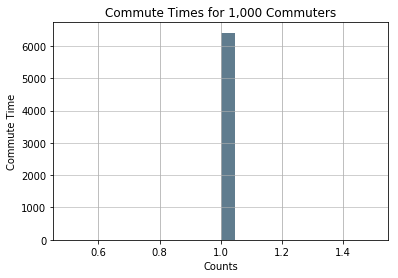

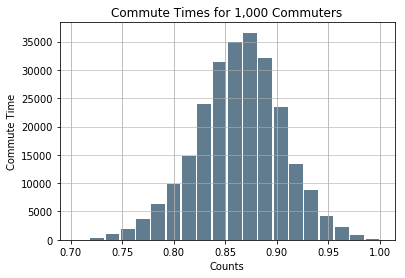

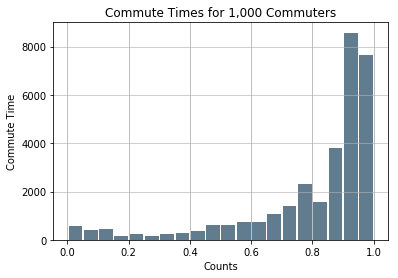

In [8]:
for r in l2:
    # Generate data on commute times.
    size, scale = 1000, 10
    data = r.matrix.flatten()
    commutes = pd.Series(data[data > 0])
    commutes.plot.hist(grid=True, bins=20, rwidth=0.9,
                       color='#607c8e')
    plt.title('Commute Times for 1,000 Commuters')
    plt.xlabel('Counts')
    plt.ylabel('Commute Time')
    plt.grid(axis='y', alpha=0.75)
    plt.show()




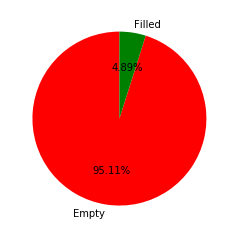

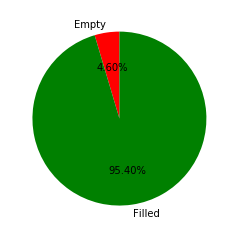

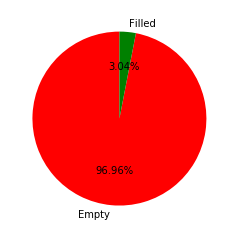

In [4]:
import matplotlib.pyplot as plt
for r in l1:
    nonzeros = np.count_nonzero(r.matrix.flatten())
    all_data = len(r.matrix.flatten())
    slices_hours = [all_data - nonzeros, nonzeros]
    activities = ['Empty', 'Filled']
    colors = ['r', 'g']
    plt.pie(slices_hours, labels=activities, colors=colors, startangle=90, autopct='%.2f%%')
    plt.show()

In [5]:
data = []
r = []
for relation in l1:
    if relation.matrix.shape[1] == 128:
        data = relation.matrix
        r = relation

        print(r.y)
        
data = np.array([x for x in range(1, 26)]).reshape(5,5)
    
order = order_by_clustering(data, 'single', 'row')

print(data)
print(order)

new_rows_order = {}
l = ['A', 'B', 'C', 'D', 'E']

for i, val in enumerate(res_order):
    new_rows_order[l[i]] = val
    
print(new_rows_order)
print(res_order)


{'GO:0005811': 44, 'GO:0005783': 9, 'GO:0061024': 43, 'GO:0007009': 8, 'GO:0007165': 107, 'GO:0005198': 25, 'GO:0007005': 104, 'GO:0005654': 16, 'GO:0000003': 42, 'GO:0016023': 15, 'GO:0005777': 100, 'GO:0016746': 51, 'GO:0005794': 4, 'GO:0003924': 32, 'GO:0006605': 105, 'GO:0043234': 18, 'GO:0016192': 60, 'GO:0048870': 85, 'GO:0005829': 97, 'GO:0030198': 99, 'GO:0016757': 22, 'GO:0016810': 56, 'GO:0044281': 36, 'GO:0022607': 95, 'GO:0032182': 23, 'GO:0003674': 50, 'GO:0016887': 68, 'GO:0003677': 49, 'GO:0008168': 40, 'GO:0000228': 101, 'GO:0043226': 53, 'GO:0008219': 39, 'GO:0005856': 81, 'GO:0051186': 90, 'GO:0000902': 114, 'GO:0042254': 55, 'GO:0065003': 108, 'GO:0016765': 17, 'GO:0006914': 2, 'GO:0048646': 98, 'GO:0016301': 41, 'GO:0006629': 52, 'GO:0006810': 67, 'GO:0006950': 64, 'GO:0008150': 5, 'GO:0034655': 72, 'GO:0019748': 34, 'GO:0030674': 58, 'GO:0005840': 94, 'GO:0008092': 1, 'GO:0005773': 111, 'GO:0005634': 61, 'GO:0016791': 26, 'GO:0030154': 27, 'GO:0016798': 89, 'GO:001

NameError: name 'order_by_clustering' is not defined

In [ ]:
dict_elem = {}
for relation in l2:
    if relation.matrix.shape[1] == 128:
        data = relation.matrix
        r = relation

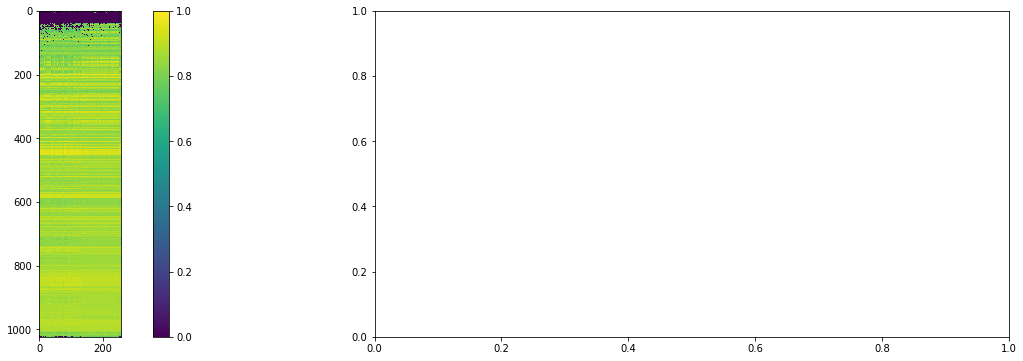

In [69]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# color_pack = 'Blues'
# color_pack = 'jet'
color_pack = 'viridis'
color_pack2 = 'viridis'
for i in range(1):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 6))
#     _, row, col, _ = model1.org_data[i].shape
#     org_data = model1.org_data[i].reshape((row, col))
#     predict = model1.predict_data[i].reshape((row, col))
    
#     print(np.min(model1.predict_data[i]))
#     print(np.max(model1.predict_data[i]))
    
    
    ax = axes[0]
    im = ax.imshow(order, vmin=0, vmax=1, cmap=plt.cm.get_cmap(color_pack))

#     ax = axes[1]
#     im2 = ax.imshow(predict, vmin=np.min(predict), vmax=np.max(predict), cmap=plt.cm.get_cmap(color_pack2))

#     ax = axes[2]
#     im = ax.imshow(predict - org_data, vmin=-1, vmax=1, cmap=plt.cm.get_cmap(color_pack))

    # fig.colorbar(im, ax=axes.ravel().tolist())
#     cax,kw = mpl.colorbar.make_axes([ax for ax in axes.flat])
    cax,kw = mpl.colorbar.make_axes([axes[0]])
#     cax2,kw2 = mpl.colorbar.make_axes([axes[1]])
    cba = plt.colorbar(im, cax=cax, **kw)
#     cbb = plt.colorbar(im2, cax=cax2, **kw2)

    plt.show()

In [51]:
l = [1,2,3,4,5,6]
print(l[:3])

[1, 2, 3]
